In [105]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import scipy.stats as spicystats
import sys
sys.path.insert(0, 'src/')
import functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
## data cleaning

df = functions.clean_dataset('../data/lending_club_loan_dataset.csv')

In [107]:
## hypothesis test: no prior delinquencies decreases the default rate

# H-null: p_default_given_none >= p_default_given prior 
# H-alt: p_default_given_none < p_default_given_prior
# significance level: alpha = 0.05


/Users/c21matthewm/DAI_Coding/daimil10/assignments/wk10/DAI_Final_Project/src/functions.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  


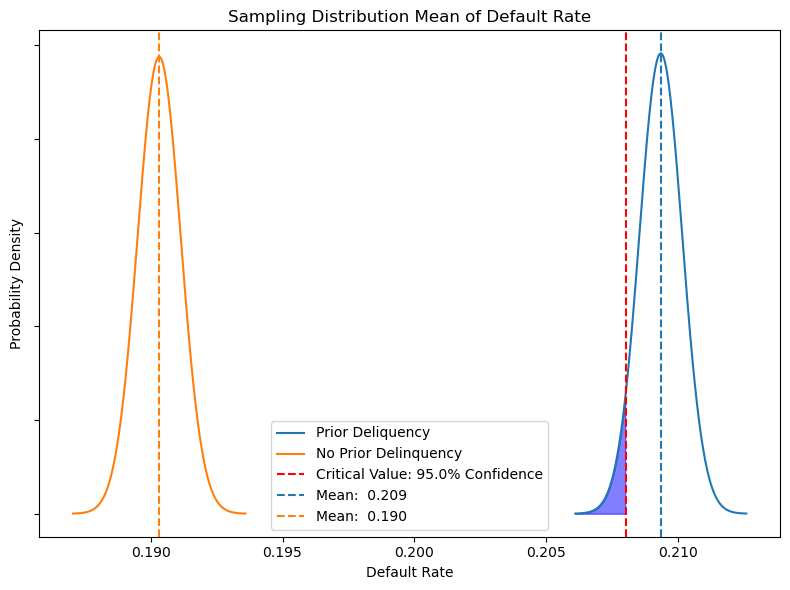

In [108]:
functions.sampling_distrbution_hypothesis_test( df['bad_loan'][df['last_delinq_none'] == 1], \
                                                df['bad_loan'][df['last_delinq_none'] == 0], \
                                                alpha=0.05, \
                                                dist_labels=['Prior Deliquency', 'No Prior Delinquency'])

In [109]:
## hypothesis test: shorter loan term decreases the default rate

# H-null: p_default_given 36 month >= p_default_given 60 month
# H-alt: p_default_given 36 month < p_default_given 60 month
# significance level: alpha = 0.05

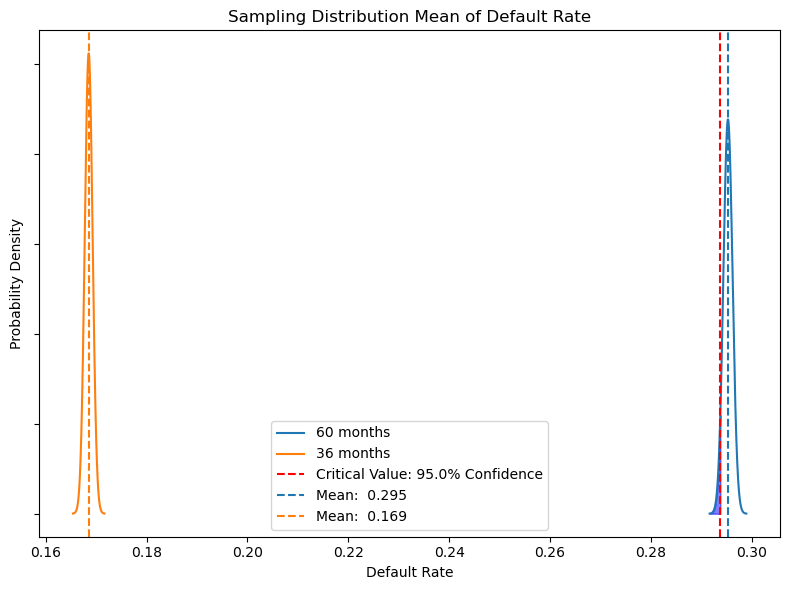

In [110]:
functions.sampling_distrbution_hypothesis_test( df['bad_loan'][df['term'] == '60 months'], \
                                                df['bad_loan'][df['term'] == '36 months'], \
                                                alpha=0.05, \
                                                dist_labels=['60 months', '36 months'])

In [111]:
## hypothesis test: home ownership decreases the default rate

# H-null: p_default_given own/mortgage home >= p_default_given rent home
# H-alt: p_default_given own/mortgage home < p_default_given rent home
# significance level: alpha = 0.05

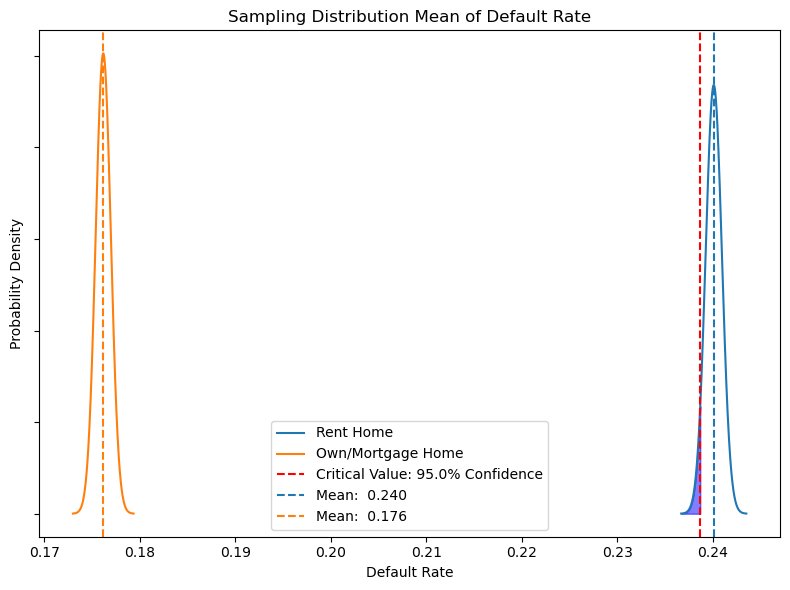

In [112]:
functions.sampling_distrbution_hypothesis_test( df['bad_loan'][df['home_ownership'] == 'RENT'], \
                                                df['bad_loan'][df['home_ownership'] != 'RENT'], \
                                                alpha=0.05, \
                                                dist_labels=['Rent Home', 'Own/Mortgage Home'])